In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [33]:
# 加载数据
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
print (X.shape, y.shape)

(1000, 2) (1000,)


In [34]:
X = X.T   # n * m
y = y.reshape(1, -1)
print (X.shape, y.shape)
print (X[:,100])

(2, 1000) (1, 1000)
[ 0.90544501 -0.82855586]


In [35]:
# 数据标准化， x = (x-u)/std  均值=0， 标准差=1，  1) 特征尺度相同，2）正则化惩罚，更加公平
X = (X - np.mean(X, axis=1, keepdims=True))/np.std(X, axis=1, keepdims=True)
print (X.shape)
print (X[:,100])

(2, 1000)
[ 0.45953777 -2.0266369 ]


In [36]:
# 分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T
print (X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(2, 800) (1, 800) (2, 200) (1, 200)


In [37]:
# 参数初始化
n, m_train = X_train.shape
print (n, m_train)
# 参数
w = np.zeros((n,1))  # 列向量 x 也是
print (w.shape)
b = 0

# hyper -para
learning_rate = 0.1
iterations = 200

cost_history = []
accuracy_history = []

2 800
(2, 1)


In [38]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [39]:
for i in range(iterations):
    # 1. 预测值计算
    z = np.dot(w.T, X_train) + b # broadcasting .  1 * 455 
    a = sigmoid(z)   # ( 0,1 )  1* 455 
 
    # 2. 误差值, 交叉熵误差：表达的是两个分布的差异
    cost =-np.mean(y_train * np.log(a) + (1-y_train) * np.log(1-a)) # 一个数
    cost_history.append(cost)

    predictions = (a>0.5).astype(int)  # {0, 1}  1 * 455
    accuracy = np.mean(predictions == y_train)   # 1 * 455   0~1 
    accuracy_history.append(accuracy)  

    # 3. 反向传播
    dz = a - y_train    # 1 * 455
    dw = np.dot(X_train, dz.T) / m_train  # 30 * 1
    db = np.sum (dz) / m_train  # R 
    
    w-= learning_rate * dw  # 30 * 1
    b-= learning_rate * db  # R

    if (i % 10 == 0):
        print (f"Iteration: {i}, cost: {cost}, Accuracy: {accuracy}")
    


Iteration: 0, cost: 0.6931471805599452, Accuracy: 0.5
Iteration: 10, cost: 0.5368383674413184, Accuracy: 0.8625
Iteration: 20, cost: 0.45527532812527804, Accuracy: 0.86375
Iteration: 30, cost: 0.40834175703604514, Accuracy: 0.865
Iteration: 40, cost: 0.37885023963785025, Accuracy: 0.86625
Iteration: 50, cost: 0.35900770105241114, Accuracy: 0.86625
Iteration: 60, cost: 0.3449426315430685, Accuracy: 0.8675
Iteration: 70, cost: 0.3345629329965834, Accuracy: 0.86875
Iteration: 80, cost: 0.32665587136673624, Accuracy: 0.86875
Iteration: 90, cost: 0.32047683817004285, Accuracy: 0.86625
Iteration: 100, cost: 0.31554649697152665, Accuracy: 0.86625
Iteration: 110, cost: 0.31154389798496784, Accuracy: 0.8675
Iteration: 120, cost: 0.3082469110354609, Accuracy: 0.86625
Iteration: 130, cost: 0.3054974062873047, Accuracy: 0.86625
Iteration: 140, cost: 0.3031800519218859, Accuracy: 0.86625
Iteration: 150, cost: 0.30120893994015413, Accuracy: 0.8675
Iteration: 160, cost: 0.29951888688629036, Accuracy:

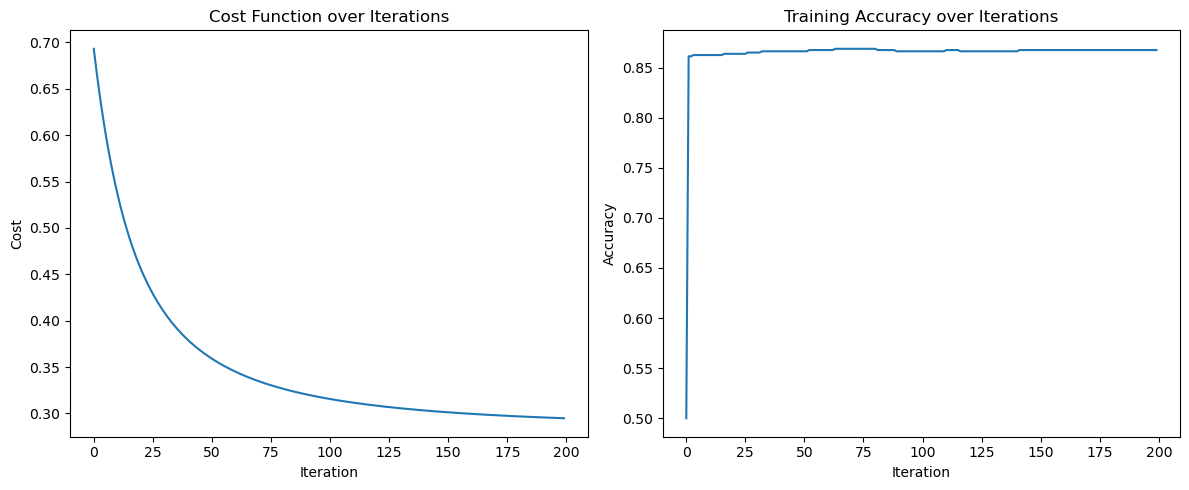

In [40]:
# 绘制训练过程
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Training Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [41]:
# 在测试集上评估
z_test = np.dot(w.T, X_test) + b
yhat_test = sigmoid(z_test)
predictions_test = (yhat_test > 0.5).astype(int)  # 0，1 
test_accuracy = np.mean(predictions_test == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 86.00%


In [30]:
## 可视化
# 由于有多个特征，我们选择前两个主成分进行可视化
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T).T
print (X_pca.shape)

(2, 1000)


(2,)
(2,)


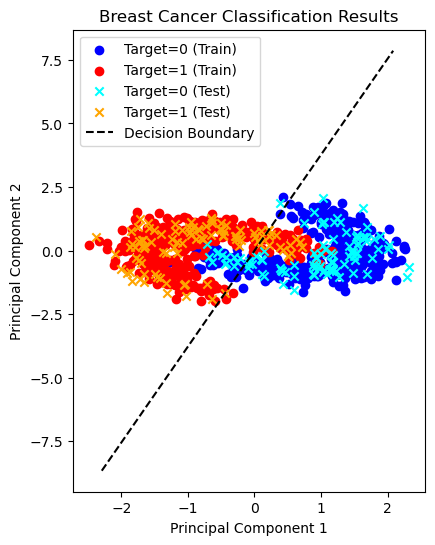

In [42]:
# 绘制二分结果
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

# 重新划分训练集和测试集的PCA结果
X_train_pca, X_test_pca = pca.transform(X_train.T).T, pca.transform(X_test.T).T

# 绘制训练集
plt.scatter(X_train_pca[0, y_train[0] == 1], X_train_pca[1, y_train[0] == 1], color='blue', label='Target=0 (Train)')
plt.scatter(X_train_pca[0, y_train[0] == 0], X_train_pca[1, y_train[0] == 0], color='red', label='Target=1 (Train)')

# 绘制测试集
plt.scatter(X_test_pca[0, y_test[0] == 1], X_test_pca[1, y_test[0] == 1], color='cyan', label='Target=0 (Test)', marker='x')
plt.scatter(X_test_pca[0, y_test[0] == 0], X_test_pca[1, y_test[0] == 0], color='orange', label='Target=1 (Test)', marker='x')

# 绘制决策边界
x_boundary = np.array([np.min(X_pca[0]), np.max(X_pca[0])])
print (x_boundary.shape)   # (2,)
# 由于我们进行了PCA，需要将决策边界投影到PCA空间
# 这是一个近似，因为PCA改变了特征空间
w_pca = pca.components_ @ w  #( 2, 30 ) => (2,1)
y_boundary = (-w_pca[0] * x_boundary - b) / w_pca[1]
print (y_boundary.shape)  # (2,)

plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')

plt.title('Breast Cancer Classification Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()